<a href="https://colab.research.google.com/github/pricilakrepeki/3W/blob/main/Introdu%C3%A7%C3%A3o_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Retrieval Augmented Generation (RAG) - TensorFlow User Group São Paulo

Inscreva-se
Meetup: https://www.meetup.com/tensorflowsp/
Youtube: https://www.youtube.com/@tensorflowugsp


![](https://drive.google.com/uc?export=view&id=16zecEitYPjoWTvr2RP3eyVKWSXf-J2sr)

## Visão Geral

A geração aumentada de recuperação (RAG, do inglês Retrieval Augmented Generation) tornou-se um paradigma popular para permitir que LLMs acessem dados externos e também como um mecanismo para mitigar alucinações. Neste notebook (e durante a live), você aprenderá os principais conceitos e como usar RAG.



### Referências


Paper: Retrieval-Augmented Generation for Large Language Models: A Survey
https://arxiv.org/abs/2312.10997

Paper: The Chronicles of RAG: The Retriever, the Chunk and the Generator
https://arxiv.org/abs/2401.07883

Paper: RAG vs Fine-tuning: Pipelines, Tradeoffs, and a Case Study on Agriculture
https://arxiv.org/abs/2401.08406

Retrieval Augmented Generation: Streamlining the creation of intelligent natural language processing models
https://ai.meta.com/blog/retrieval-augmented-generation-streamlining-the-creation-of-intelligent-natural-language-processing-models/

Advanced RAG Techniques: an Illustrated Overview
https://pub.towardsai.net/advanced-rag-techniques-an-illustrated-overview-04d193d8fec6


Prompt Engineering Guide
https://www.promptingguide.ai/techniques/rag

Building RAG-based LLM Applications for Production
https://www.anyscale.com/blog/a-comprehensive-guide-for-building-rag-based-llm-applications-part-1

### Custos

Este tutorial usa componentes faturáveis do Google Cloud:

- Vertex AI

Leia mais sobre [preço do Vertex AI ](https://cloud.google.com/vertex-ai/pricing) e uso o [Calculador de Preço](https://cloud.google.com/products/calculator/) para gerar uma estimativa de custo com base no uso projetado.


### Instale a SDK da Vertex AI para o python e outras dependencias

In [ ]:
! pip3 install --upgrade --user google-cloud-aiplatform pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 25.2 MB/s eta 0:00:00


In [ ]:
!pip3 install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 1.9 MB/s eta 0:00:00


In [ ]:
!pip3 install cohere umap-learn altair annoy datasets tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 750.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a06dfdf56b2e18ed9e70a9b06a45e5b651f069859c183f2b22b0a9cbfdd6a151
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  C

In [ ]:
!pip3 install --upgrade cohere

### **Reinicie o kernel do notebook**

Execute a célula abaixo para realizar o restart do kernel do notebook (etapa importante para que o Colab reconheça a nova versão da SDK)

In [ ]:
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### **Autentique o seu ambiente de notebook**

Execute a célula abaixo para realizar a autenticação da sua sessão de notebook com a Google Cloud Esse passo é importante **para utilização no Colab** para garantir que as chamadas a APIs de Google Cloud funcionem sem problemas.

[Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).


In [ ]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### **Defina o projeto Google Cloud a ser utilizado**

Execute a célula abaixo para definir qual projeto Google Cloud será utilizado pelo Colab na execução deste notebook.


In [ ]:
# Define project information

PROJECT_ID = "vinicaridateste"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: vinicaridateste


In [ ]:
import sys

if "google.colab" in sys.modules:
    # Initialize Vertex AI
    import vertexai

    vertexai.init(project=PROJECT_ID, location=LOCATION)

### Importe as bibliotecas necessárias


In [ ]:
import cohere
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset
import umap
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [ ]:
from IPython.display import Markdown, display
from vertexai.preview.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    Image,
    Part,
)
from vertexai.language_models import TextEmbeddingModel

In [ ]:
import getpass
api_key = getpass.getpass("enter your co.here api token")

enter your co.here api token··········


## Importe e carrege o modelo `Gemini Pro`


In [ ]:
model = GenerativeModel("gemini-pro-vision")
text_embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

### Gere textos a partir de prompts de texto

Envie um prompt de texto para o modelo.


In [ ]:
responses = model.generate_content("Por que o céu é azul?", stream=True)

for response in responses:
    print(response.text, end="")

O céu é azul devido ao fenômeno chamado dispersão de Rayleigh. A luz branca viaja em ondas, e cada cor tem um comprimento de onda diferente. A luz violeta tem o menor comprimento de onda, enquanto a luz vermelha tem o maior.

Quando a luz branca passa pela atmosfera da Terra, as moléculas de nitrogênio e oxigênio que a compõem espalham a luz de forma mais eficiente quanto menor o comprimento de onda. Isso significa que a luz violeta é espalhada mais do que a luz vermelha.

A dispersão da luz violeta faz com que o céu pareça azul durante o dia. À medida que o sol se põe, a luz tem que viajar por uma camada mais espessa da atmosfera para chegar aos nossos olhos. Isso significa que mais luz azul é espalhada, e o céu fica vermelho ou laranja.

O céu também pode parecer azul à noite, mesmo quando não há sol. Isso acontece porque a luz da lua e das estrelas é também espalhada pelas moléculas de nitrogênio e oxigênio na atmosfera.

#### Experimente alguns prompts. Tente suas próprias instruções!

In [ ]:
prompt = """Crie uma lista numerada de 10 itens. Cada item da lista deve ser uma tendência na indústria de tecnologia.

Cada tendência deve ter menos de 5 palavras.""" # tente seu próprio prompt

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

1. Inteligência Artificial
2. Realidade Aumentada
3. Realidade Virtual
4. Computação Quântica
5. 5G
6. Internet das Coisas
7. Blockchain
8. Robótica
9. Cibersegurança
10. Edge Computing

#### Parâmetros do modelo

Cada prompt enviado ao modelo inclui valores de parâmetros que controlam como o modelo gera uma resposta. O modelo pode gerar resultados diferentes para valores de parâmetros diferentes. Você pode experimentar diferentes parâmetros do modelo para ver como os resultados mudam.


In [ ]:
generation_config = GenerationConfig(
    temperature=0.99, # altere esta variável para testar temperaturas diferentes (entre 0 e 1.0)
    top_p=1.0, # altere esta variável para testar top_p diferentes (entre 0.1 e 1.0)
    top_k=32, # altere esta variável para testar top_k diferentes (entre 1 e 40)
    candidate_count=1,
    max_output_tokens=2048, # altere esta variável para testar diferentes tamanhos de respostas (entre 1 e 2048 para o Gemini-Pro)
)

responses = model.generate_content(
    "Por que o céu é azul?",
    generation_config=generation_config,
    stream=True,
)

for response in responses:
    print(response.text, end="")

O céu é azul porque a luz do sol é composta por uma mistura de cores, incluindo vermelho, laranja, amarelo, verde, azul, índigo e violeta. Quando essa luz viaja através da atmosfera, as partículas mais curtas e mais azuis são mais dispersas do que as cores mais longas, como o vermelho e o laranja. Isso ocorre porque as moléculas de nitrogênio e oxigênio no ar, que são muito menores do que os comprimentos de onda da luz vermelha e laranja, são capazes de espalhar a luz azul de forma mais eficaz.

Esse espalhamento, chamado de dispersão Rayleigh, é o que faz com que o céu pareça azul. É também o motivo pelo qual o céu parece mais azul em um dia claro e ensolarado. Quando há mais partículas na atmosfera, como poeira ou poluição, elas podem absorver ou espalhar parte da luz azul, fazendo com que o céu pareça menos azul.

O pôr do sol e o nascer do sol são momentos em que o céu pode ficar vermelho, laranja ou amarelo. Isso ocorre porque, durante esses horários, a luz do sol tem que viajar a

Temperatura - Quanto mais baixa a temperatura, mais determinísticos são os resultados, no sentido de que o próximo token mais provável é sempre escolhido. O aumento da temperatura pode levar a mais aleatoriedade, o que incentiva resultados mais diversificados ou criativos.

Top P - Uma técnica de amostragem com temperatura, chamada amostragem de núcleo, onde você pode controlar o quão determinístico é o modelo. Se você está procurando respostas exatas e factuais, mantenha esse valor baixo. Se você procura respostas mais diversas, aumente para um valor mais alto.

Comprimento máximo – Você pode gerenciar o número de tokens que o modelo gera ajustando o comprimento máximo. Especificar um comprimento máximo ajuda a evitar respostas longas ou irrelevantes e a controlar custos.

Sequências de parada - Uma sequência de parada é uma string que impede o modelo de gerar tokens. Especificar sequências de parada é outra maneira de controlar a duração e a estrutura da resposta do modelo.

Penalidade de frequência - A penalidade de frequência aplica uma penalidade no próximo token proporcional a quantas vezes esse token já apareceu na resposta e no prompt. Quanto maior a penalidade de frequência, menor a probabilidade de uma palavra aparecer novamente. Essa configuração reduz a repetição de palavras na resposta do modelo, atribuindo aos tokens que aparecem mais uma penalidade maior.

Penalidade de Presença - A penalidade de presença também aplica uma penalidade em tokens repetidos, mas, diferentemente da penalidade de frequência, a penalidade é a mesma para todos os tokens repetidos. Um token que aparece duas vezes e um token que aparece 10 vezes são penalizados da mesma forma. Essa configuração evita que o modelo repita frases com muita frequência em sua resposta. Se quiser que o modelo gere texto diversificado ou criativo, você pode usar uma penalidade de presença mais alta. Ou, se precisar que o modelo mantenha o foco, tente usar uma penalidade de presença menor.

Semelhante à temperatura e ao top_p, a recomendação geral é alterar a penalidade de frequência ou presença, mas não ambas.

Antes de começar com alguns exemplos básicos, lembre-se de que seus resultados podem variar dependendo da versão do LLM que você usa.

https://www.promptingguide.ai/introduction/settings

How to generate text: using different decoding methods for language generation with Transformers

https://huggingface.co/blog/how-to-generate

### Teste os prompts de chat

O modelo Gemini Pro oferece suporte a chats com vários turnos e é ideal para tarefas de texto que exigem interações de ida e volta. Os exemplos a seguir mostram como o modelo responde durante uma conversa multiturnos.

In [ ]:
chat = model.start_chat()

prompt = """Meu nome é Vinicius. Você é meu assistente pessoal. Meus filmes favoritos são Gladiador e O ultimo samurai.

Sugira outro filme que eu possa gostar.
"""

responses = chat.send_message(prompt, stream=True)

for response in responses:
    print(response.text, end="")

* **Coração Valente (1995)**: Este épico histórico conta a história de William Wallace (Mel Gibson), um guerreiro escocês que lidera uma rebelião contra a opressão inglesa. O filme é conhecido por suas cenas de batalha emocionantes e sua história inspiradora de liberdade e independência.


* **Tróia (2004)**: Este filme conta a história da Guerra de Tróia, que foi travada entre gregos e troianos por causa de Helena de Tróia (Diane Kruger). O filme é conhecido por seu elenco estelar, que inclui Brad Pitt, Eric Bana e Orlando Bloom, e por suas cenas de batalha épicas.


* **300 (2006)**: Este filme de ação conta a história da Batalha das Termópilas, que foi travada entre gregos e persas em 480 a.C. O filme é conhecido por suas cenas de batalha visuais e estilizadas, e por sua história de bravura e sacrifício.


* **O Senhor dos Anéis: A Sociedade do Anel (2001)**: Este filme é o primeiro da trilogia Senhor dos Anéis e conta a história de Frodo Bolseiro (Elijah Wood), um hobbit que herda 

Este prompt de acompanhamento mostra como o modelo responde com base no prompt anterior:

In [ ]:
prompt = "O que estes filmes tem em comum com os filmes que eu gosto?"

responses = chat.send_message(prompt, stream=True)

for response in responses:
    print(response.text, end="")

Os filmes que você mencionou, Gladiador e O Último Samurai, são ambos épicos históricos que contam histórias de guerreiros lutando por honra, justiça e liberdade. Eles também são conhecidos por suas cenas de batalha emocionantes e suas performances poderosas.

Os filmes que eu sugeri têm elementos semelhantes, como:

* **Coração Valente**: É um épico histórico que conta a história de um guerreiro escocês lutando pela independência de seu país. O filme tem cenas de batalha emocionantes e uma história inspiradora de liberdade e sacrifício.


* **Tróia**: É um épico histórico que conta a história da Guerra de Tróia, travada entre gregos e troianos por causa de Helena de Tróia. O filme tem um elenco estelar e cenas de batalha épicas.


* **300**: É um filme de ação que conta a história da Batalha das Termópilas, travada entre gregos e persas. O filme tem cenas de batalha visuais e estilizadas, e uma história de bravura e sacrifício.


* **O Senhor dos Anéis: A Sociedade do Anel**: É um fil

Você também pode ter acesso ao histórico do chat:

In [ ]:
print(chat.history)

[role: "user"
parts {
  text: "Meu nome \303\251 Vinicius. Voc\303\252 \303\251 meu assistente pessoal. Meus filmes favoritos s\303\243o Gladiador e O ultimo samurai.\n\nSugira outro filme que eu possa gostar.\n"
}
, role: "model"
parts {
  text: "* **Cora\303\247\303\243o Valente (1995)**: Este \303\251pico hist\303\263rico conta a hist\303\263ria de William Wallace (Mel Gibson), um guerreiro escoc\303\252s que lidera uma rebeli\303\243o contra a opress\303\243o inglesa. O filme \303\251 conhecido por suas cenas de batalha emocionantes e sua hist\303\263ria inspiradora de liberdade e independ\303\252ncia.\n\n\n* **Tr\303\263ia (2004)**: Este filme conta a hist\303\263ria da Guerra de Tr\303\263ia, que foi travada entre gregos e troianos por causa de Helena de Tr\303\263ia (Diane Kruger). O filme \303\251 conhecido por seu elenco estelar, que inclui Brad Pitt, Eric Bana e Orlando Bloom, e por suas cenas de batalha \303\251picas.\n\n\n* **300 (2006)**: Este filme de a\303\247\303\243o c

Basicamente, o que estamos fazendo até aqui foi usar um Large Language Model (LLM) existente, no qual podemos fazer perguntas (prompt) e receber uma resposta (Output Text Generated).

![](https://drive.google.com/uc?export=view&id=1tGImkqzhLytOuhipNK4_L1JH2-hENQkr)


Nesse contexto não alteramos o LLM e o que podemos fazer para melhorar a resposta é ajustar a entrada (ou prompt) e seus parametros.

## Prompt engineering guide
https://platform.openai.com/docs/guides/prompt-engineering

https://www.promptingguide.ai/




![](https://drive.google.com/uc?export=view&id=18OadLMRtMnpCnDYg6wH2xYo6e-1WX4TS)

### Porém, muitas vezes, mesmo com o melhor Prompt você não alcança o resultado esperado. O que fazer nesses casos?

In [ ]:
prompt = """Quem foi o vencedor da Mega-Sena da virada de 2023?"""

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

Como meu conhecimento é limitado até maio de 2022, não tenho acesso a informações sobre o vencedor da Mega-Sena da virada de 2023. Para obter informações atualizadas, consulte fontes oficiais, como o site da Caixa Econômica Federal.

In [ ]:
prompt = """Qual a ação da bolsa de valores do Brasil que teve melhor desempenho em 2023?"""

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

Como meu conhecimento é limitado até julho de 2022, não tenho acesso a informações sobre o desempenho das ações da bolsa de valores do Brasil em 2023. Recomendo consultar uma fonte mais atualizada.

In [ ]:
prompt = "Me fale sobre a cafeteira do Star Wars. Como é o café do mestre Yoda?"

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

#https://www.3coracoes.com.br/materias/tres-e-star-wars%EF%B8%8F/

Não existe uma cafeteira do Star Wars e nem mesmo o café do mestre Yoda, uma vez que a série Star Wars se passa em um universo fictício.

In [ ]:
prompt = "Me fale mais do processo da Prefeitura Municipal de Iguape versus Antonio Joao da Silva"

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

#https://www.jusbrasil.com.br/processos/675930123/processo-n-151XXXX-8220238260244-do-tjsp

O processo da Prefeitura Municipal de Iguape versus Antonio João da Silva não existe, portanto não posso lhe fornecer informações sobre ele.

In [ ]:
prompt = "Preciso de detalhes sobre o lucro líquido básico e diluído por ação Classe A, Classe B e Classe C do Google?"

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

#https://abc.xyz/assets/investor/static/pdf/20220202_alphabet_10K.pdf

O Google não tem ações Classe A, Classe B ou Classe C, possui apenas ações ordinárias e ações da Classe C.

**Lucro Líquido Básico por Ação (EPS)**

O lucro líquido básico por ação é calculado dividindo o lucro líquido da empresa pelo número de ações ordinárias em circulação. O lucro líquido é o lucro que resta após o pagamento de todas as despesas, incluindo impostos, juros e depreciação.

**Lucro Líquido Diluído por Ação (EPS)**

O lucro líquido diluído por ação é calculado dividindo o lucro líquido da empresa pelo número diluído de ações em circulação. O número diluído de ações em circulação é o número de ações ordinárias em circulação mais o número de ações que seriam emitidas se todos os títulos ou opções conversíveis fossem exercidos.

Por exemplo, se uma empresa tiver um lucro líquido de US$ 1 bilhão, 100 milhões de ações ordinárias em circulação e 10 milhões de opções de ações, o lucro líquido básico por ação seria de US$ 10 por ação. O lucro líquido diluído por ação seria de U

![](https://drive.google.com/uc?export=view&id=1XNZWqcirSpvB2ap2naUiIPVVPq1qs62z)

## Como definir a melhor estratégia?

Paper: RAG vs Fine-tuning: Pipelines, Tradeoffs, and a Case Study on Agriculture

https://arxiv.org/abs/2401.08406

![](https://drive.google.com/uc?export=view&id=1HAfqHKF9YTWQx17b_rGhF0ZA4pSg1P6z)

Paper: Retrieval-Augmented Generation for Large Language Models: A Survey

https://arxiv.org/abs/2312.10997


Paper: The Chronicles of RAG: The Retriever, the Chunk and the Generator

https://arxiv.org/abs/2401.07883


# RAG

![](https://drive.google.com/uc?export=view&id=1I4qghHPweSOKmPHfJr_WRWAc5nlWWYrG)

![](https://drive.google.com/uc?export=view&id=1NkQR8y0AHUUpRB0If5IcCXeVfRL-MTqE)


![](https://drive.google.com/uc?export=view&id=1Y2ab1ADJeo8nDAmUixNITXeqtOhIIMBC)

## Vamos recapitular alguns conceitos

Arquitetura Transformers
https://www.youtube.com/watch?v=EwyP7OVnmXE

NLP e Embeddings
https://www.youtube.com/watch?v=u7tUcLu0Vp4




Recusos adicionais

Exemplo Usando LangChain (Notebook Pedro)
https://colab.research.google.com/drive/18PEedTlnb97d0l6lO6sCOWm83S-blg_U

Explicação Embedding (Notebook André)
https://colab.research.google.com/drive/1xjYpOV1fz5pARQJS-B0O7s4sDvKNIOGR?usp=sharing


A questão é: onde você colocaria a palavra “Apple” neste plano? Há muitos lugares onde ele poderia ir, mas qual você escolheria entre as três possibilidades A, B e C?

![](https://drive.google.com/uc?export=view&id=1sACLo2vex6PjmLUjiKVOht8lyVxcSxP2)

Vejamos quatro palavras, “Filhotinho de cachorro”, “Cachorro”, “Bezerro” e “Vaca”. Essas palavras estão claramente correlacionadas. Agora, para testar sua intuição novamente, temos no plano as palavras “Filhotinho de cachorro”, “Cachorro” e “Bezerro”. Onde você o adicionaria a palavra “Vaca”: A, B ou C?

![](https://drive.google.com/uc?export=view&id=1b2VCE9ScqBpb10XVsnasoq9UNxjaT3sW)



In [ ]:
from gensim.models import Word2Vec
sentences = [["cow", "and", "calf", "say", "moo"], ["dog", "and", "puppy", "say", "woof"]]
model = Word2Vec(sentences, min_count=1)
print(model.wv["cow"])

[ 8.1681199e-03 -4.4430327e-03  8.9854337e-03  8.2536647e-03
 -4.4352221e-03  3.0310510e-04  4.2744912e-03 -3.9263200e-03
 -5.5599655e-03 -6.5123225e-03 -6.7073823e-04 -2.9592158e-04
  4.4630850e-03 -2.4740540e-03 -1.7260908e-04  2.4618758e-03
  4.8675989e-03 -3.0808449e-05 -6.3394094e-03 -9.2608072e-03
  2.6657581e-05  6.6618943e-03  1.4660227e-03 -8.9665223e-03
 -7.9386048e-03  6.5519023e-03 -3.7856805e-03  6.2549924e-03
 -6.6810320e-03  8.4796622e-03 -6.5163244e-03  3.2880199e-03
 -1.0569858e-03 -6.7875278e-03 -3.2875966e-03 -1.1614120e-03
 -5.4709399e-03 -1.2113475e-03 -7.5633135e-03  2.6466595e-03
  9.0701487e-03 -2.3772502e-03 -9.7651005e-04  3.5135616e-03
  8.6650876e-03 -5.9218528e-03 -6.8875779e-03 -2.9329848e-03
  9.1476962e-03  8.6626766e-04 -8.6784009e-03 -1.4469790e-03
  9.4794659e-03 -7.5494875e-03 -5.3580985e-03  9.3165627e-03
 -8.9737261e-03  3.8259076e-03  6.6544057e-04  6.6607012e-03
  8.3127534e-03 -2.8507852e-03 -3.9923131e-03  8.8979173e-03
  2.0896459e-03  6.24894

In [ ]:
model.wv["cow"].shape

(100,)

![](https://drive.google.com/uc?export=view&id=1vNXdzkgNv8iwC6bUfWkzI4Ww03KdOvJf)


![](https://drive.google.com/uc?export=view&id=1oYmdja4H-m8H_fHiyFtCIfvzZNoyIq15)

![](https://drive.google.com/uc?export=view&id=1_DniY5sB2RjECdL3jK-RSiDVjAehoand)


![](https://drive.google.com/uc?export=view&id=1kT3U7OZzz7zA7mRGII2zTuBo3jm_QVtj)

A SIMPLE BUT TOUGH-TO-BEAT BASELINE FOR SENTENCE EMBEDDINGS
https://openreview.net/pdf?id=SyK00v5xx

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
sentences = ["This is an example sentence.", "Here is another sentence."]
embeddings = embed(sentences)
print(embeddings)

tf.Tensor(
[[-0.0370564   0.04130714 -0.0464787  ...  0.01797815 -0.01851224
   0.00818835]
 [ 0.0212487  -0.03869876 -0.01409733 ...  0.02088924  0.04538541
  -0.02898427]], shape=(2, 512), dtype=float32)


Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks
https://arxiv.org/abs/1908.10084

What Are Word and Sentence Embeddings?
https://txt.cohere.com/sentence-word-embeddings/

Embeddings são uma forma de representar o significado do texto como uma lista de números. Isso é útil porque, uma vez que o texto esteja neste formato, ele pode ser comparado a outro texto em termos de similaridade, agrupamento, classificação e outros casos de uso. Usando uma função de comparação simples, podemos calcular uma pontuação de similaridade para dois embeddings para descobrir se dois textos estão falando sobre coisas semelhantes.

![](https://drive.google.com/uc?export=view&id=1-hjZlireb1FjAoC7tFHtrVgaGTp0fmE7)

![](https://drive.google.com/uc?export=view&id=1HJ47k4214dDSSUsUwqoFn3LZbsA-e77V)


Na célula baixo, os embeddings para duas frases semelhantes têm uma pontuação de similaridade alta, e os embeddings para duas frases não relacionadas têm uma pontuação de similaridade baixa.

In [ ]:
co = cohere.Client(api_key)

# get the embeddings
phrases = ["i love soup", "soup is my favorite", "london is far away"]
(soup1, soup2, london) = co.embed(phrases).embeddings
#(soup1, soup2, london) = embed(phrases) #Teste com outros embedings


# compare them
def calculate_similarity(a, b):
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print(calculate_similarity(soup1, soup2))
print(calculate_similarity(soup1, london))


default model on embed will be deprecated in the future, please specify a model in the request.


0.9008875648263115
0.2650852334481806


Embeddings normalizados
https://developers.google.com/machine-learning/clustering/similarity/measuring-similarity?hl=pt-br

## Semantic Search

![](https://drive.google.com/uc?export=view&id=1hmfcJQtwi25rgj7iX1qOyzbh9GsjBU3b)

## Obtenha o arquivo de perguntas
Usaremos o conjunto de dados trec (https://www.tensorflow.org/datasets/catalog/trec) que é composto por perguntas e suas categorias.

In [ ]:
# Get dataset
dataset = load_dataset("trec", split="train")

# Import into a pandas dataframe, take only the first 1000 rows
df = pd.DataFrame(dataset)[:1000]

# Preview the data to ensure it has loaded correctly
#print(df.head(10))

Generating train split:   0%|          | 0/5452 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
# Preview the data to ensure it has loaded correctly
df.head(10)

,text,coarse_label,fine_label
0,How did serfdom develop in and then leave Russia ?,2,26
1,What films featured the character Popeye Doyle ?,1,5
2,How can I find a list of celebrities ' real names ?,2,26
3,What fowl grabs the spotlight after the Chinese Year of the Monkey ?,1,2
4,What is the full form of .com ?,0,1
5,What contemptible scoundrel stole the cork from my lunch ?,3,29
6,What team did baseball 's St. Louis Browns become ?,3,28
7,What is the oldest profession ?,3,30
8,What are liver enzymes ?,2,24
9,Name the scar-faced bounty hunter of The Old West .,3,29


## Embed o arquivo
O próximo passo é "embedar" o texto das perguntas.

![](https://drive.google.com/uc?export=view&id=1XpFjL9rhLK1EIixHxMAa6nSANtUnf5Z_)


MTEB: Massive Text Embedding Benchmark
https://huggingface.co/blog/mteb


BEIR - Benchmarking IR
https://eval.ai/web/challenges/challenge-page/1897/leaderboard/4475

-------
https://huggingface.co/intfloat/multilingual-e5-large

In [ ]:
# We'll set up the name of the model we want to use, the API key, and the input type.
# Create and retrieve a Cohere API key from dashboard.cohere.ai/welcome/register
# Paste your API key here. Remember to not share publicly
model_name = "embed-english-v3.0"
input_type_embed = "search_document"

# Now we'll set up the cohere client.
co = cohere.Client(api_key)

# Get the embeddings
embeds = co.embed(texts=list(df['text']),
                  model=model_name,
                  input_type=input_type_embed).embeddings


In [ ]:
# Check the dimensions of the embeddings
embeds = np.array(embeds)
embeds.shape

(1000, 1024)

In [ ]:
embeds

array([[ 0.07629395,  0.00634003,  0.01190186, ...,  0.00372887,
         0.00060892,  0.04553223],
       [ 0.01667786,  0.01265717, -0.00650024, ..., -0.06143188,
        -0.0302887 , -0.0184021 ],
       [-0.03643799,  0.02258301, -0.06292725, ..., -0.06793213,
        -0.04367065, -0.01542664],
       ...,
       [ 0.04879761,  0.02558899,  0.0049057 , ..., -0.04559326,
        -0.02827454,  0.01242828],
       [-0.03152466,  0.00702286, -0.0463562 , ..., -0.0153656 ,
        -0.05322266,  0.02420044],
       [-0.03262329, -0.02690125, -0.01376343, ..., -0.06799316,
        -0.06414795,  0.00892639]])

Pesquise usando um índice e vizinho mais próximo

## Pesquise usando um índice e pesquisa do vizinho mais próximo
![Construindo o índice de pesquisa a partir dos embeddings](https://github.com/cohere-ai/notebooks/raw/main/notebooks/images/semantic-search-index.png)

Vamos usar [Annoy](https://github.com/spotify/annoy) para construir um índice que armazene os embeddings de uma forma otimizada para pesquisa rápida. Essa abordagem se adapta bem a um grande número de textos (outras opções incluem [Faiss](https://github.com/facebookresearch/faiss), [ScaNN](https://github.com/google-research/google-research /tree/master/scann) e [PyNNDescent](https://github.com/lmcinnes/pynndescent)).

Depois de construir o índice, podemos usá-lo para recuperar os vizinhos mais próximos de questões existentes ou de novas questões que incorporamos.

In [ ]:
# Create the search index, pass the size of embedding
search_index = AnnoyIndex(np.array(embeds).shape[1], 'angular')

# Add all the vectors to the search index
for i in range(len(embeds)):
    search_index.add_item(i, embeds[i])
search_index.build(10) # 10 trees
search_index.save('test.ann')

True

### Encontre os vizinhos de um exemplo do conjunto de dados
Se estivermos interessados apenas em medir a distância entre as questões no conjunto de dados (sem consultas externas), uma maneira simples é calcular a distância entre cada par de embeddings que temos.

In [ ]:
# Choose an example (we'll retrieve others similar to it)
example_id = 92

# Retrieve nearest neighbors
similar_item_ids = search_index.get_nns_by_item(example_id,10,
                                                include_distances=True)
# Format and print the text and distances
results = pd.DataFrame(data={'texts': df.iloc[similar_item_ids[0]]['text'],
                             'distance': similar_item_ids[1]}).drop(example_id)

print(f"Question:'{df.iloc[example_id]['text']}'\nNearest neighbors:")
results

Question:'What are bear and bull markets ?'
Nearest neighbors:


,texts,distance
601,What is `` the bear of beers '' ?,0.874250
614,What animals do you find in the stock market ?,0.899422
137,What are equity securities ?,0.930625
185,"What is the 401 , K , plan ?",0.991794
787,When was `` the Great Depression '' ?,1.012337
729,What are the five most expensive cities in the world ?,1.017943
547,Where can stocks be traded on-line ?,1.018465
422,What is the difference between classical conditioning and operant conditioning ?,1.020965
543,What is a fear of thunder ?,1.020982


### Encontre os vizinhos de uma consulta do usuário
Não estamos limitados a pesquisar usando itens existentes. Se obtivermos uma consulta, podemos incorporá-la e encontrar seus vizinhos mais próximos no conjunto de dados.

In [ ]:
query = "What is the tallest mountain in the world?"
input_type_query = "search_query"

# Get the query's embedding
query_embed = co.embed(texts=[query],
                  model=model_name,
                  input_type=input_type_query).embeddings

# Retrieve the nearest neighbors
similar_item_ids = search_index.get_nns_by_vector(query_embed[0],10,
                                                include_distances=True)
# Format the results
query_results = pd.DataFrame(data={'texts': df.iloc[similar_item_ids[0]]['text'],
                             'distance': similar_item_ids[1]})


print(f"Query:'{query}'\nNearest neighbors:")
#print(query_results)
query_results

Query:'What is the tallest mountain in the world?'
Nearest neighbors:


,texts,distance
236,What is the name of the tallest mountain in the world ?,0.670030
670,What is the highest mountain in the world ?,0.788044
412,What was the highest mountain on earth before Mount Everest was discovered ?,0.900438
907,What mountain range is traversed by the highest railroad in the world ?,0.939731
435,What is the highest peak in Africa ?,0.962585
109,Where is the highest point in Japan ?,0.999868
901,What 's the longest river in the world ?,1.060933
555,Where do people mountain climb in Nepal ?,1.064564
656,What 's the tallest building in New York City ?,1.078650
114,What is the largest snake in the world ?,1.086904


## Visualizando o arquivo
Por fim, vamos plotar todas as questões em um gráfico 2D para que você possa visualizar as semelhanças semânticas deste conjunto de dados!

In [ ]:
#@title Plot the archive {display-mode: "form"}

# UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
reducer = umap.UMAP(n_neighbors=20)
umap_embeds = reducer.fit_transform(embeds)

# Prepare the data to plot and interactive visualization
# using Altair
df_explore = pd.DataFrame(data={'text': df['text']})
df_explore['x'] = umap_embeds[:,0]
df_explore['y'] = umap_embeds[:,1]

# Plot
chart = alt.Chart(df_explore).mark_circle(size=60).encode(
    x=#'x',
    alt.X('x',
        scale=alt.Scale(zero=False)
    ),
    y=
    alt.Y('y',
        scale=alt.Scale(zero=False)
    ),
    tooltip=['text']
).properties(
    width=700,
    height=400
)
chart.interactive()

alt.Chart(...)

# RAG

Agora vamos construir um mecanismo de busca de documentos usando geração aumentada de recuperação multimodal (RAG), passo a passo:

1. Extraia e armazene metadados de documentos contendo texto e imagens e gere embeddings
2. Pesquise os metadados com consultas de texto para encontrar textos ou imagens semelhantes
3. Pesquise os metadados com consultas de imagens para encontrar imagens semelhantes
4. Usando uma consulta de texto como entrada, pesquise respostas contextuais usando texto e imagens

### Baixe módulos e utilitários Python customizados

A célula abaixo fará o download de algumas funções auxiliares necessárias para este notebook. Você também pode visualizar o código (`intro_multimodal_rag_utils.py`) diretamente no [Github](https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/intro_multimodal_rag_utils.py).

In [ ]:
import os
import urllib.request
import sys

if not os.path.exists("utils"):
    os.makedirs("utils")


# download the helper scripts from utils folder
url_prefix = "https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/"
files = ["intro_multimodal_rag_utils.py"]

for fname in files:
    urllib.request.urlretrieve(f"{url_prefix}/{fname}", filename=f"utils/{fname}")

#### Baixe documentos e imagens do Cloud Storage

In [ ]:
# download documents and images used in this notebook
!gsutil -m rsync -r gs://github-repo/rag/intro_multimodal_rag .
print("Download finalizado.")


both the source and destination. Your crcmod installation isn't using the
module's C extension, so checksumming will run very slowly. If this is your
first rsync since updating gsutil, this rsync can take significantly longer than
usual. For help installing the extension, please see "gsutil help crcmod".

Building synchronization state...
Starting synchronization...
Copying gs://github-repo/rag/intro_multimodal_rag/text_query_answer_02.png...
Copying gs://github-repo/rag/intro_multimodal_rag/class_a_share.png...
Copying gs://github-repo/rag/intro_multimodal_rag/google-10k-sample-14pages.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/tac_table_revenue.png...
Copying gs://github-repo/rag/intro_multimodal_rag/text_query_answer_01.png...
- [5/5 files][823.1 KiB/823.1 KiB] 100% Done                                    
Operation completed over 5 objects/823.1 KiB.                                    
Download finalizado.


## Construa os metadados dos documentos

### Os dados

Os dados que você usará neste notebook são uma versão modificada do [Google-10K](https://abc.xyz/assets/investor/static/pdf/20220202_alphabet_10K.pdf) que fornece uma visão geral abrangente da situação financeira da Alphabet, como desempenho, operações de negócios, gerenciamento e fatores de risco. Como o documento original é bastante grande, para título de exemplo, usaremos [uma versão modificada com apenas 14 páginas](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/google-10k-sample-14pages.pdf). Embora esteja truncado, o documento de amostra ainda contém texto junto com imagens como tabelas, tabelas e gráficos.

### Importe funções auxiliares para construir metadados

Antes de construir o sistema RAG, é importante ter metadados de todos os textos e imagens do documento. Para fins de referências e citações, os metadados devem conter elementos essenciais, incluindo número de página, nome do arquivo, contador de imagens e assim por diante. Portanto, como próxima etapa, você gerará embeddings a partir dos metadados, que serão necessários para realizar a pesquisa de similaridade ao consultar os dados.

In [ ]:
from utils.intro_multimodal_rag_utils import get_document_metadata

### Extraia e armazene metadados de texto e imagens de um documento

Você acabou de importar uma função chamada `get_document_metadata()`. Esta função extrai metadados de texto e imagem de um documento e retorna dois dataframes, *text_metadata* e *image_metadata*, como saídas. Se você quiser saber mais sobre como a função `get_document_metadata()` é implementada usando Gemini e os modelos de *embeddings*, você pode dar uma olhada no [código-fonte](https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/intro_multimodal_rag_utils.py) diretamente.

A razão para extrair e armazenar metadados de texto e metadados de imagem é que apenas usar um dos dois não é suficiente para obter uma resposta relevante. Por exemplo, as respostas relevantes poderiam estar em formato visual dentro de um documento, mas o RAG baseado em texto não poderá levar em consideração as imagens visuais. Você também explorará esse exemplo posteriormente neste notebook.

In [ ]:
model = GenerativeModel("gemini-pro-vision")
text_embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

Na próxima etapa, você usará a função para extrair e armazenar metadados de texto e imagens de um documento. Observe que a célula a seguir pode levar alguns minutos para ser concluída:

In [ ]:
pdf_path = "google-10k-sample-14pages.pdf"

image_description_prompt = """Explique a imagem.
Não inclua números que não sejam mencionados na imagem:"""

# Se for uma tabela, extraia os elementos da tabela.
# Se for um gráfico, explique as descobertas no gráfico.

text_metadata_df, image_metadata_df = get_document_metadata(
    PROJECT_ID,
    model,
    pdf_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    text_emb_text_limit=1000,
)

print("--- Processamento finalizado. ---")

Processing page: 1
Processing page: 2
Extracting image from page: 2, saved as: images/google-10k-sample-14pages.pdf_image_1_0_10.jpeg
Processing page: 3
Extracting image from page: 3, saved as: images/google-10k-sample-14pages.pdf_image_2_0_13.jpeg
Processing page: 4
Extracting image from page: 4, saved as: images/google-10k-sample-14pages.pdf_image_3_0_16.jpeg
Processing page: 5
Extracting image from page: 5, saved as: images/google-10k-sample-14pages.pdf_image_4_0_19.jpeg
Processing page: 6
Processing page: 7
Extracting image from page: 7, saved as: images/google-10k-sample-14pages.pdf_image_6_0_24.jpeg
Extracting image from page: 7, saved as: images/google-10k-sample-14pages.pdf_image_6_1_25.jpeg
Processing page: 8
Extracting image from page: 8, saved as: images/google-10k-sample-14pages.pdf_image_7_0_28.jpeg
Processing page: 9
Processing page: 10
Extracting image from page: 10, saved as: images/google-10k-sample-14pages.pdf_image_9_0_33.jpeg
Processing page: 11
Extracting image fro

#### Inspecione os metadados de texto processados

A célula a seguir produzirá uma tabela de metadados que descreve as diferentes partes dos metadados de texto, incluindo:

- **text**: o texto original da página
- **text_embedding_page**: o *embedding* do texto original da página
- **chunk_text**: o texto original dividido em pedaços menores
- **chuck_number**: o índice de cada pedaço de texto
- **text_embedding_chunk**: a *embedding* de cada pedaço de texto

In [ ]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,google-10k-sample-14pages.pdf,1,"source: https://abc.xyz/assets/investor/static/pdf/20220202_alphabet_10K.pdf\nMARKET FOR REGISTRANTS COMMON EQUITY, RELATED\nSTOCKHOLDER MATTERS AND ISSUER PURCHASES OF EQUITY\nSECURITIES\nAs of October 2, 2015, Alphabet Inc. became the successor issuer of Google Inc.\npursuant to Rule 12g-3(a) under the Exchange Act. Our Class A common stock\nhas been listed on the Nasdaq Global Select Market under the symbol GOOG\nsince August 19, 2004 and under the symbol ""GOOGL"" since April 3, 2014. Prior\nto August 19, 2004, there was no public market for our stock. Our Class B\ncommon stock is neither listed nor traded. Our Class C capital stock has been\nlisted on the Nasdaq Global Select Market under the symbol GOOG since April\n3, 2014.\nHolders of Record\nAs of December 31, 2021, there were approximately 4,907 and 1,733\nstockholders of record of our Class A common stock and Class C capital stock,\nrespectively. Because many of our shares of Class A common stock and Class C\ncapital stock are held by brokers and other institutions on behalf of stockholders,\nwe are unable to estimate the total number of stockholders represented by these\nrecord holders. As of December 31, 2021, there were approximately 64\nstockholders of record of our Class B common stock.\nDividend Policy\nWe have never declared or paid any cash dividend on our common or capital\nstock. The primary use of capital continues to be to invest for the long-term\ngrowth of the business. We regularly evaluate our cash and capital structure,\nincluding the size, pace, and form of capital return to stockholders.\n","[0.0865526646, -0.0283534527, 0.0130726704, 0.0319572501, -0.00356242131, -0.0265768748, 0.000977886841, 0.0246491209, -0.0209292695, -0.0117914146, 0.0121716261, 0.0201523025, 0.0437379591, 0.0296674743, -0.00947959721, -0.014792, 0.0314359106, 0.0483413935, 0.00481229369, 0.0393223874, 0.0189847518, 0.0174695645, -0.00502803549, 0.00246514729, 0.0359447896, 0.00563932, -0.0453775972, 0.022274334, 0.0502335653, 0.00658335444, 0.00967203, -0.0491599627, 0.0414168425, 0.0442795232, 0.0306408461, 0.0418427959, -0.00633720588, -9.09378214e-05, 0.0126880668, 0.0411790423, 0.0023227185, -0.00722634187, -0.0409271456, 0.0289355591, 0.0137923677, 0.013506772, 0.0155432271, -0.0308864359, 0.0119423065, 0.0168777797, -0.00879935268, 0.0500425771, 0.0356166624, 0.0267071594, -0.00189415982, -0.00142759143, 0.014429694, 0.0395416878, -0.010022698, 0.02340932, 0.0305456314, 0.00322252535, 0.000377850083, 0.0290486943, -0.0104690054, -0.0170217566, 0.0462259, -0.000664980966, -0.0272169169, -0.0059962552, -0.00194372854, 0.0224438496, 0.0372264, -0.0211036913, 0.0138320019, 0.0402732678, -0.0105349245, -0.0183752161, -0.031048879, 0.0560792722, -0.0235534552, 0.0239470154, 0.00391103327, 0.0150221903, 0.019621877, -0.020690497, -0.00401995517, 0.0358700193, 0.0107701067, -0.0036954158, -0.0217854641, 0.0397221632, -0.00454719, -0.00555826863, 0.032077197, 0.0154669639, 0.0579405613, -0.0201609768, 0.0271584801, -0.000380405603, ...]",1,"source: https://abc.xyz/assets/investor/static/pdf/20220202_alphabet_10K.pdf\nMARKET FOR REGISTRANTS COMMON EQUITY, RELATED\nSTOCKHOLDER MATTERS AND ISSUER PURCHASES OF EQUITY\nSECURITIES\nAs of October 2, 2015, Alphabet Inc. became the successor issuer of Google Inc.\npursuant to Rule 12g-3(a) under the Exchange Act. Our Class A common stock\nhas been listed on the Nasdaq Global Select Market under the symbol GOOG\nsince August 19, 2004 and under the symbol ""GOOGL"" since April 3, 2014. Prior\nto August 19, 2004, there was no public market for our stock. Our Class B\ncommon stock is neither listed nor traded. Our Class C capital stock has been\nlisted on the Nasdaq Global Select Market under the symbol GOOG since April\n3, 2014.\nHolders of Record\nAs of December 31, 2021, there were approximately 4,907 and 1,733\ns

#### Inspecione os metadados das imagens processadas

A célula a seguir produzirá uma tabela de metadados que descreve as diferentes partes dos metadados da imagem, incluindo:
* **img_desc**: descrição textual da imagem gerada pelo Gemini.
* **mm_embedding_from_text_desc_and_img**: Embedding combinada de imagem e sua descrição, capturando informações visuais e textuais.
* **mm_embedding_from_img_only**: Embedding de imagem sem descrição, para comparação com análise baseada em descrição.
* **text_embedding_from_image_description**: Embedding de texto separada da descrição gerada, permitindo análise e comparação textual.

In [ ]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_text_desc_and_img,mm_embedding_from_img_only,text_embedding_from_image_description
0,google-10k-sample-14pages.pdf,2,1,images/google-10k-sample-14pages.pdf_image_1_0_10.jpeg,"A imagem mostra o número total de ações Classe A e Classe C recompradas pela empresa, bem como o preço médio pago por ação. As ações foram recompradas no mercado aberto e por meio de transações privadas. O programa de recompra de ações não tem data de vencimento.","[0.0232487693, -0.000800791138, 0.0152805122, -0.000454280176, 0.027500689, 0.0186665636, -0.00471620867, 0.00445911894, -0.0339691862, -0.00886529, -0.0111833634, 0.0411534831, 0.0642204061, 0.0211859215, 0.00789372344, -0.0561676025, 0.00353404344, 0.00250394316, -0.0474450029, 0.0123534715, -0.0792509615, 0.0333858654, -0.0300569367, 0.0351534449, 0.0469706059, -0.0283350665, -0.00197716057, 0.0284431074, -0.0262303744, -0.00109290273, 0.0240457226, -0.00818778295, 0.0131138405, 0.0036683986, -0.0140475119, -0.0133579085, 0.0442266911, -0.0194915868, 0.0118432865, -0.0177242924, 0.0209244546, 0.0398562104, -0.00939985551, 0.000588784169, 0.0186343119, 0.0261399597, 0.0135098938, -0.0260125604, 0.0423013568, -0.0269509759, -0.0286115408, 0.00921368785, -0.00574338483, -0.0178274959, 0.0110212704, 0.0442180708, 0.00932800211, -0.0108914757, -0.0368721597, 0.00185466418, -0.0152028967, -0.000430382148, 0.00858331099, -0.0108652068, 0.0132844727, -0.000263218069, -0.0138150332, -0.00622380245, 0.0474214964, -0.0288099088, -0.00781560782, -0.0134620117, -0.00804721471, 0.0151888672, 0.0527850762, -0.0160811, 0.00831415225, 0.0161433816, -0.0174962562, 0.0300685391, 0.0269271415, -0.00136816874, 0.000311480777, 0.0110906819, -0.00691826036, 0.0455373116, -0.012219172, -0.00111729139, -0.0101658544, 0.0124243898, -0.0599170253, 0.00377395097, -0.0195763446, -0.146844283, -0.0401442, -0.0293311272, -0.00218375982, -0.026322592, -0.0246175155, -0.0175359603, ...]","[0.0232482236, -0.000801557675, 0.0152807888, -0.000453259621, 0.0275011249, 0.0186670031, -0.0047168117, 0.00445944956, -0.0339696966, -0.00886546541, -0.0111833075, 0.0411529467, 0.0642203838, 0.0211853459, 0.00789401121, -0.0561673678, 0.00353410374, 0.00250197831, -0.0474458151, 0.0123536689, -0.0792509839, 0.0333866663, -0.0300561599, 0.0351536386, 0.0469708405, -0.0283350497, -0.00197615125, 0.0284435377, -0.0262299925, -0.00109240459, 0.0240453836, -0.00818789, 0.0131126931, 0.00366766821, -0.0140472148, -0.0133578759, 0.044227384, -0.0194909908, 0.0118436189, -0.0177240632, 0.0209262688, 0.039856039, -0.0093997186, 0.000589125382, 0.0186343, 0.0261383224, 0.0135106547, -0.0260119848, 0.0423004739, -0.0269507617, -0.0286115408, 0.00921466853, -0.0057428726, -0.0178277679, 0.0110217799, 0.0442178771, 0.00932786427, -0.0108918184, -0.036872454, 0.00185517326, -0.0152030457, -0.000430901564, 0.00858320668, -0.0108660394, 0.0132849663, -0.000262989226, -0.0138137024, -0.0062230723, 0.0474211909, -0.0288096312, -0.0078153694, -0.0134628452, -0.00804708805, 0.0151897324, 0.0527854674, -0.0160812084, 0.00831387285, 0.0161445141, -0.0174960159, 0.0300676767, 0.026927948, -0.00136837841, 0.000311582698, 0.0110916356, -0.00691801589, 0.0455376618, -0.0122191701, -0.00111739093, -0.0101663964, 0.0124246934, -0.0599171594, 0.00377393677, -0.0195760373, -0.146843642, -0.0401443914, -0.0293318722, -0.0021849412, -0.0263219755, -0.0246172808, -0.0175353717, ...]","[0.0632798374, -0.0172274895, 0.0132811423, 0.00694691204, 0.00807513576, -0.0167607088, 0.00561140385, -0.0045792493, -0.0165421553, 0.0058584176, -0.0175596625, 0.0168237519, -0.00811336376, 0.0218520984, 0.00616573822, -0.00788367819, 0.0082247518, 0.0520612374, 0.02005421, 0.0330197178, -0.00817161333, 0.0130400024, -0.0196571685, 0.0151599282, -0.0023013202, 0.00953986403, 0.000379202742, -0.00503276894, 0.0290499888, -0.00911338814, -0.00616299827, -0.00489635626, 0.0323654786, -0.0107735852, 0.00220332853, -0.00506907

### Importe as funções auxiliares para implementar o RAG

Você importará as seguintes funções que serão usadas no restante deste notebook para implementar o RAG:

* **get_similar_text_from_query():** Dada uma consulta de texto, encontra textos do documento que são relevantes, usando o algoritmo de similaridade de cosseno. Ele usa embedding de texto dos metadados para calcular e os resultados podem ser filtrados por pontuação máxima, número de página/bloco ou tamanho de embedding.
* **print_text_to_text_citation():** Cite a fonte (citação) e detalhes do texto recuperado da função `get_similar_text_from_query()`.
* **get_similar_image_from_query():** Dado um caminho de imagem ou uma imagem, encontra imagens do documento que são relevantes. Ele usa iembedding de imagens dos metadados.
* **print_text_to_image_citation():** Cite a fonte (citação) e os detalhes das imagens recuperadas da função `get_similar_image_from_query()`.
* **get_gemini_response():** Interage com um modelo Gemini para responder perguntas com base em uma combinação de entradas de texto e imagem.

In [ ]:
from utils.intro_multimodal_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
)

Antes de implementar um RAG, vamos dar um passo atrás e explorar o que você pode conseguir apenas com embeddings de texto ou imagem. Isso ajudará a estabelecer as bases para a implementação de um RAG, o que você fará na parte posterior do notebook. Você também pode usar esses elementos essenciais juntos para criar aplicativos para extrair informações significativas de documentos.

## Busca textual

Vamos começar a pesquisa com uma pergunta simples e ver se a pesquisa de texto simples usando incorporações de texto pode respondê-la. A resposta esperada é mostrar o valor do lucro líquido básico e diluído por ação do Google para diferentes tipos de ações.

In [ ]:
query = "Preciso de detalhes sobre o lucro líquido básico e diluído por ação Classe A, Classe B e Classe C do Google?"

### Search similar text with text query

In [ ]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    PROJECT_ID,
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    embedding_size=1408,
    chunk_text=True,
)

# Print the matched text citations
#print_text_to_text_citation(matching_results_text, print_top=True, chunk_text=True)

Citation 1: Matched text: 

score:  0.41
page_number:  5
chunk_number:  1
chunk_text:   Revenues were $257.6 billion, an increase of 41%. The increase in
revenues was primarily driven by Google Services and Google Cloud. The
adverse effect of COVID-19 on 2020 advertising revenues also contributed
to the year-over-year growth.
 Cost of revenues was $110.9 billion, an increase of 31%, primarily driven
by increases in TAC and content acquisition costs.
 An overall increase in data centers and other operations costs was partially
offset by a reduction in depreciation expense due to the change in the
estimated useful life of our servers and certain network equipment. 
Operating expenses were $68.0 billion, an increase of 20%, primarily
driven by headcount growth, increases in advertising and promotional
expenses and charges related to legal matters.
Other information:
 Operating cash flow was $91.7 billion, primarily driven by revenues
generated from our advertising products.
 Share repurch

Embora a resposta tenha sido devolvida, ela não retornou o valor relevante, que é o lucro líquido básico e diluído por ação. Isso ocorre porque as informações estão disponíveis apenas nas imagens e não na parte do texto do documento. Este é um dos exemplos de uma pesquisa de texto padrão (incluindo RAG de texto) que não retorna informações relevantes, embora as informações estejam presentes no documento.

**Importante:** criamos exemplos em nosso documento para simular casos do mundo real em que as informações geralmente estão incorporadas em gráficos, tabelas, gráficos e outros elementos baseados em imagens e não estão disponíveis como texto simples.

### Busque imagens a partir de buscas textuais

Como a pesquisa de texto simples não forneceu a resposta desejada e as informações podem ser representadas visualmente em uma tabela ou outro formato de imagem, você usará o recurso multimodal do modelo `Gemini Pro Vision`. O objetivo aqui também é encontrar uma imagem semelhante à consulta de texto. Você também pode listar as citações para verificar.


 **** Resultado: ***** 



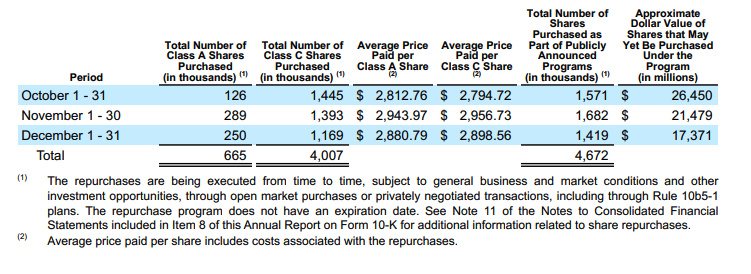

In [ ]:
matching_results_image = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=3,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Resultado: ***** \n")

# Display the top matching image
display(matching_results_image[0]["image_object"])


A busca encontrou exatamente o que você procurava. Você queria os detalhes sobre o lucro líquido básico e diluído das ações Classe A, B e C do Google. Esta imagem se encaixa perfeitamente graças aos seus metadados descritivos usando Gemini.

Você também pode ver a citação e verificar o que Gemini extraiu como descrição para o resultado principal.

In [ ]:
## you can check the citations to probe further.
## check the "image description:" which is a description extracted through gemini which helped search our query.
Markdown(print_text_to_image_citation(matching_results_image, print_top=True))

Citation 1: Mached image path, page number and page text: 

score:  0.43
path:  images/google-10k-sample-14pages.pdf_image_1_0_10.jpeg
page number:  2
page text:  Issuer Purchases of Equity Securities
The following table presents information with respect to Alphabet's repurchases
of Class A common stock and Class C capital stock during the quarter ended
December 31, 2021:
Stock Performance Graphs
The graph below matches Alphabet Inc. Class A's cumulative 5-year total
stockholder return on common stock with the cumulative total returns of the S&P
500 index, the NASDAQ Composite index, and the RDG Internet Composite
index. The graph tracks the performance of a $100 investment in our common
stock and in each index (with the reinvestment of all dividends) from December
31, 2016 to December 31, 2021. The returns shown are based on historical
results and are not intended to suggest future performance.

image description:   A imagem mostra o número total de ações Classe A e Classe C recomprad

<IPython.core.display.Markdown object>

### Similaridade de imagens utilizando a busca por imagem

Imagine pesquisar imagens, mas em vez de digitar palavras, você usa uma imagem real como pista. Você tem uma tabela com números sobre o custo da receita de dois anos e deseja encontrar outras imagens semelhantes, no mesmo documento ou em vários documentos.

Pense nisso como pesquisar com um minimapa em vez de um endereço escrito. É uma maneira diferente de perguntar: “Mostre-me mais coisas como esta”. Então, em vez de digitar “tabela de custo de receita 2020 2021”, você mostra uma imagem dessa tabela e diz: “Encontre-me mais como isto”

Para fins de demonstração, encontraremos apenas imagens semelhantes que mostram o custo da receita ou valores semelhantes em um único documento abaixo. No entanto, você pode dimensionar esse padrão de design para corresponder (encontrar imagens relevantes) em vários documentos.

***Imagem enviada pelo usuário:***


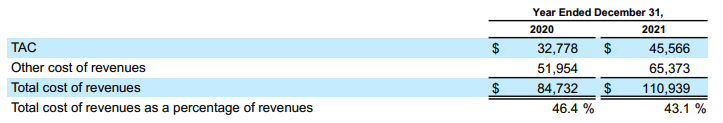

In [ ]:
# You can find a similar image as per the images you have in the metadata.
# In this case, you have a table (picked from the same document source) and you would like to find similar tables in the document.
image_query_path = "tac_table_revenue.png"

# Print a message indicating the input image
print("***Imagem enviada pelo usuário:***")

# Display the input image
Image.load_from_file(image_query_path)


Você espera encontrar tabelas (como imagens) semelhantes em termos de "Other/Total cost of revenues".


 **** Resultado: ***** 



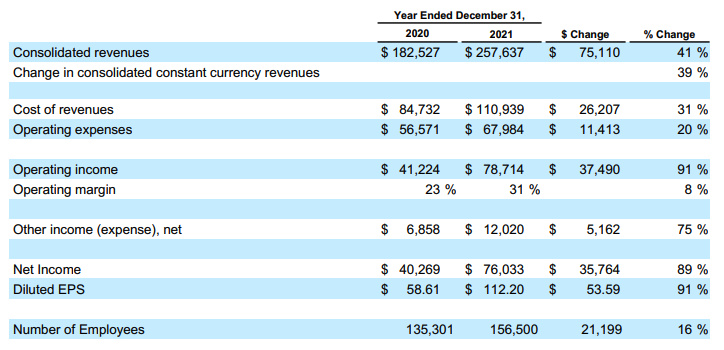

In [ ]:
# Search for Similar Images Based on Input Image and Image Embedding

matching_results_image = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    query=query,  # Use query text for additional filtering (optional)
    column_name="mm_embedding_from_img_only",  # Use image embedding for similarity calculation
    image_emb=True,
    image_query_path=image_query_path,  # Use input image for similarity calculation
    top_n=3,  # Retrieve top 3 matching images
    embedding_size=1408,  # Use embedding size of 1408
)

print("\n **** Resultado: ***** \n")

# Display the Top Matching Image
display(
    matching_results_image[0]["image_object"]
)  # Display the top matching image object (Pillow Image)


O modelo encontrou uma imagem (tabela) de aparência semelhante, que fornece mais detalhes sobre diferentes receitas, despesas, receitas e mais alguns detalhes com base na imagem fornecida. Mais importante ainda, ambas as tabelas mostram números relacionados ao “custo da receita”.

Você também pode listar a citação para ver o que ela corresponde.

In [ ]:
# Display citation details for the top matching image
print_text_to_image_citation(matching_results_image, print_top=True)  # Print citation details for the top matching image

Citation 1: Mached image path, page number and page text: 

score:  0.77
path:  images/google-10k-sample-14pages.pdf_image_4_0_19.jpeg
page number:  5
page text:   Revenues were $257.6 billion, an increase of 41%. The increase in
revenues was primarily driven by Google Services and Google Cloud. The
adverse effect of COVID-19 on 2020 advertising revenues also contributed
to the year-over-year growth.
 Cost of revenues was $110.9 billion, an increase of 31%, primarily driven
by increases in TAC and content acquisition costs.
 An overall increase in data centers and other operations costs was partially
offset by a reduction in depreciation expense due to the change in the
estimated useful life of our servers and certain network equipment. 
Operating expenses were $68.0 billion, an increase of 20%, primarily
driven by headcount growth, increases in advertising and promotional
expenses and charges related to legal matters.
Other information:
 Operating cash flow was $91.7 billion, primaril

---------------Imagens encontradas------------------



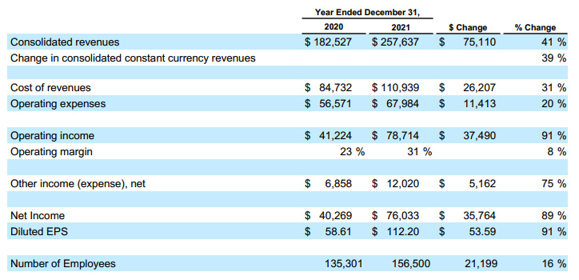

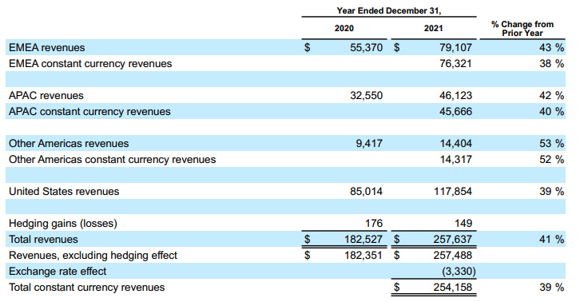

In [ ]:
# Check Other Matched Images (Optional)
# You can access the other two matched images using:

print("---------------Imagens encontradas------------------\n")
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
    ],
    resize_ratio = 0.8
)

A capacidade de identificar textos e imagens semelhantes com base na entrada do usuário, alimentada pelo Gemini e embeddings, constitui uma base crucial para o desenvolvimento de sistemas RAG multimodais, que você explorará na próxima seção.

### *Reasoning* comparativo

Imagine que você tem um gráfico que mostra o desempenho das ações Classe A do Google em comparação com outras coisas, como o S&P 500 ou outras empresas de tecnologia. Você quer saber o desempenho das ações da Classe C em comparação com esse gráfico. Em vez de apenas encontrar outra imagem semelhante, você pode pedir para o Modelo comparar as imagens relevantes e dizer em qual ação seria melhor para você investir. O modelo então explicaria o *reasoning* da sugestão.

O objetivo é enviar uma imagem de referência (ações Classe A do Google) e fazer perguntas simples de raciocínio como “Como isso se compara às ações Classe C?”. Você espera que os embeddings de imagens encontrem a imagem dos compartilhamentos Classe C e, em seguida, enviem a imagem de referência (compartilhamento Classe A) e a imagem semelhante (compartilhamento Classe C) para o Modelo e façam um raciocínio comparativo.

***Imagem enviada pelo usuário:***


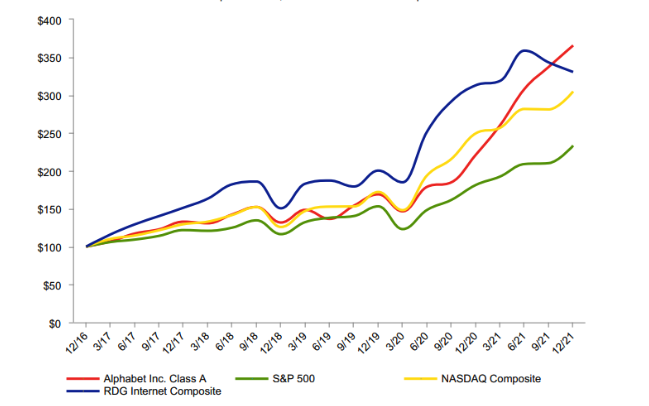

In [ ]:
image_query_path = "class_a_share.png"

# Print a message indicating the input image
print("***Imagem enviada pelo usuário:***")

# Display the input image
Image.load_from_file(image_query_path)


In [ ]:
# Load the input image using Pillow
user_image_object = Image.load_from_file(image_query_path)

# Define the comparison query
compare_query = """Pergunta: Quem performou melhor? NASDAQ Composite ou ações Classe A do Google?
Resposta: """
instructions = """instruções: Compare duas imagens e baseie seu raciocínio apenas nas imagens fornecidas.
Forneça um raciocínio detalhado de suas conclusões.
Imagens: """

# Find similar images based on the input image
image_selected_based_on_source_image = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    image_query_path=image_query_path,
    column_name="mm_embedding_from_img_only",
    image_emb=True,
    top_n=3,
    embedding_size=1408,
)

# Select the best matching image from the search results
selected_image_object = image_selected_based_on_source_image[0]["image_object"]

# Prepare the model input
model_input = [instructions, user_image_object, selected_image_object, compare_query]

# Generate Gemini response with streaming output
Markdown(get_gemini_response(model, model_input=model_input, stream=True))

 As ações Classe A do Google tiveram um desempenho melhor.

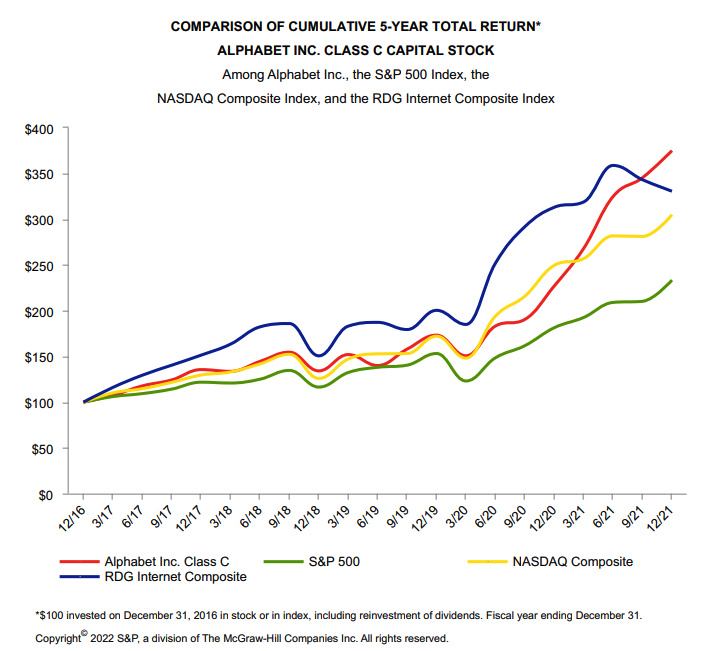

In [ ]:
# image selected by the model to make the comparision based on user query
Image.load_from_file(image_selected_based_on_source_image[0]["img_path"])

O Gemini não apenas encontrou a imagem compartilhada do Google Classe C, mas também fez um raciocínio comparativo e forneceu uma resposta contextual à consulta do usuário com o raciocínio adequado. Você também pode tornar o raciocínio mais fundamentado passando as descrições das imagens e o texto da página (texto disponível ao redor dos gráficos) para que haja menos chances de alucinação.

In [ ]:
# citations
print_text_to_image_citation(image_selected_based_on_source_image, print_top=True)

Citation 1: Mached image path, page number and page text: 

score:  0.75
path:  images/google-10k-sample-14pages.pdf_image_3_0_16.jpeg
page number:  4
page text:  Executive Overview
The following table summarizes consolidated financial results for the years ended
December 31, 2020 and 2021 unless otherwise specified (in millions, except for
per share information and percentages):

image description:   A imagem mostra o desempenho de algumas ações ao longo do tempo. O eixo x representa o tempo, e o eixo y representa o retorno total acumulado. As linhas representam as ações da Alphabet Inc. ( vermelha), S&P 500 (verde), NASDAQ Composite (amarelo) e RDG Internet Composite (azul).

As ações da Alphabet Inc. tiveram o melhor desempenho, com um retorno total acumulado de cerca de 400% em cinco anos. As ações da S&P 500 tiveram um retorno total acumulado de cerca de 300% no mesmo período. As ações da NASDAQ Composite tiveram um retorno total acumulado de cerca de 250%, e as ações da RDG Inter


<div class="alert alert-block alert-warning">
<b>⚠️ IMPORTANTE: Este não é um verdadeiro conselho de investimento e não deve ser levado a sério!! ⚠️</b>
</div>


## RAG

Vamos juntar tudo para implementar o RAG. Você usará todos os elementos explorados nas seções anteriores para implementar o RAG. Estas são as etapas:

* **Etapa 1:** O usuário faz uma consulta em formato de texto onde as informações esperadas estão disponíveis no documento e incorporadas em imagens e texto.
* **Etapa 2:** Encontre todos os trechos de texto das páginas dos documentos usando um método semelhante ao que você explorou em `Pesquisa de texto`.
* **Etapa 3:** Encontre todas as imagens semelhantes nas páginas com base na consulta do usuário correspondente a `image_description` usando um método idêntico ao que você explorou em `Image Search`.
* **Etapa 4:** Combine todos os textos e imagens semelhantes encontrados nas etapas 2 e 3 como `context_text` e `context_images`.
* **Etapa 5:** Com a ajuda do Gemini, podemos passar a consulta do usuário com o contexto de texto e imagem encontrado nas etapas 2 e 3. Você também pode adicionar uma instrução específica que o modelo deve lembrar ao responder à consulta do usuário.
* **Etapa 6:** Gemini produz a resposta e você pode listar as citações para verificar todos os textos e imagens relevantes usados para responder à consulta.

### Etapa 1: Requisição do usuário

In [ ]:
# this time we are not passing any images, but just a simple text query.

query = """Pergunta: Quais os melhores resultados, NASDAQ Composite ou ações Classe A do Google?
Qual seria melhor comprar e por quê?
Resposta: """

# query = """Question: Find the total revenues and other related financial numbers for Alphabet
# Answer: """

### Etapa 2: Busca de todos os *chunks* de texto relevantes

In [ ]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    PROJECT_ID,
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=5,
    embedding_size=1408,
    chunk_text=True,
)

Citation 1: Matched text: 

score:  0.36
page_number:  9
chunk_number:  3
chunk_text:   Delaware law, which preclude our Board of Directors
from declaring or paying unequal per share dividends on our Class A, Class B,
and Class C stock. Specifically, Delaware law provides that amendments to our
certificate of incorporation which would have the effect of adversely altering the
rights, powers, or preferences of a given class of stock must be approved by the
class of stock adversely affected by the proposed amendment. In addition, our
certificate of incorporation provides that before any such amendment may be put
to a stockholder vote, it must be approved by the unanimous consent of our



### Etapa 3: Busca de todas as imagens relevantes

In [ ]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=3,
    embedding_size=1408,
)


### Step 4: Crie o `context_text` e o `context_images`

In [ ]:
# combine all the selected relevant text chunks
context_text = []
for key, value in matching_results_chunks_data.items():
    context_text.append(value["chunk_text"])
final_context_text = "\n".join(context_text)

# combine all the relevant images and their description generated by Gemini
context_images = []
for key, value in matching_results_image_fromdescription_data.items():
    context_images.extend(
        ["Imagem: ", value["image_object"], "Descrição: ", value["image_description"]]
    )


### Step 5: Passe o contexto ao Gemini

In [ ]:
instructions = """O contexto de extração de informações deve ser baseado no contexto de texto fornecido em "text_context" e no contexto de imagem fornecido em "image_context" junto com sua legenda: \n
Baseie sua resposta em "text_context" e "image_context". Não utilize números ou porcentagens que não estejam presentes no "image_context".
Utilize somente informações presentes no contexto, não utilize nenhuma outra informação. Considere apenas os anos citados no contexto.
Não inclua nenhum retorno total cumulativo na resposta. Contexto:
"""

final_prompt = [
    query,
    instructions,
    "text_context:",
    "\n".join(context_text),
    "image_context:",
]
final_prompt.extend(context_images)

In [ ]:
Markdown(get_gemini_response(model, model_input = final_prompt,stream=True))

 O gráfico de desempenho das ações mostra que o NASDAQ Composite teve um retorno total acumulado de 102,9% de 31 de dezembro de 2016 a 31 de dezembro de 2021. O retorno total acumulado das ações Classe A do Google foi de 156,9% no mesmo período. Portanto, as ações Classe A do Google tiveram um desempenho melhor do que o NASDAQ Composite.

As ações Classe A do Google podem ser uma compra melhor do que o NASDAQ Composite porque a empresa tem um histórico de forte crescimento e rentabilidade. O Google é uma das empresas de tecnologia mais bem-sucedidas do mundo e seus produtos e serviços são usados por bilhões de pessoas em todo o mundo. A empresa também tem uma forte posição financeira e um grande caixa.

---------------Imagens encontradas------------------



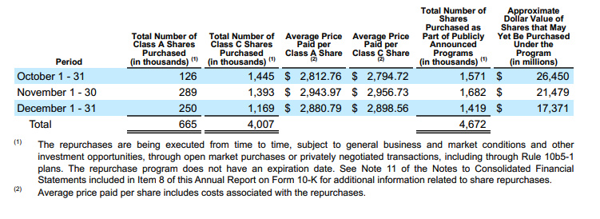

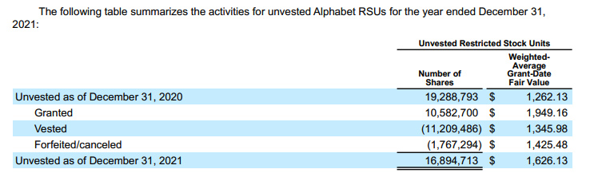

In [ ]:
print("---------------Imagens encontradas------------------\n")
display_images(
    [
        matching_results_image_fromdescription_data[0]["img_path"],
        matching_results_image_fromdescription_data[1]["img_path"],
    ],
    resize_ratio = 0.8
)


### Etapa 6: Liste citações e referências

In [ ]:
# Image citations. You can check how Gemini generated metadata helped in grounding the answer.

print_text_to_image_citation(matching_results_image_fromdescription_data, print_top=False)

Citation 1: Mached image path, page number and page text: 

score:  0.39
path:  images/google-10k-sample-14pages.pdf_image_1_0_10.jpeg
page number:  2
page text:  Issuer Purchases of Equity Securities
The following table presents information with respect to Alphabet's repurchases
of Class A common stock and Class C capital stock during the quarter ended
December 31, 2021:
Stock Performance Graphs
The graph below matches Alphabet Inc. Class A's cumulative 5-year total
stockholder return on common stock with the cumulative total returns of the S&P
500 index, the NASDAQ Composite index, and the RDG Internet Composite
index. The graph tracks the performance of a $100 investment in our common
stock and in each index (with the reinvestment of all dividends) from December
31, 2016 to December 31, 2021. The returns shown are based on historical
results and are not intended to suggest future performance.

image description:   A imagem mostra o número total de ações Classe A e Classe C recomprad

In [ ]:
# Text citations

print_text_to_text_citation(
    matching_results_chunks_data,
    print_top=False,
    chunk_text=True,
)


Citation 1: Matched text: 

score:  0.36
page_number:  9
chunk_number:  3
chunk_text:   Delaware law, which preclude our Board of Directors
from declaring or paying unequal per share dividends on our Class A, Class B,
and Class C stock. Specifically, Delaware law provides that amendments to our
certificate of incorporation which would have the effect of adversely altering the
rights, powers, or preferences of a given class of stock must be approved by the
class of stock adversely affected by the proposed amendment. In addition, our
certificate of incorporation provides that before any such amendment may be put
to a stockholder vote, it must be approved by the unanimous consent of our

Citation 2: Matched text: 

score:  0.35
page_number:  9
chunk_number:  1
chunk_text:  The TAC rate on Google Search & other properties revenues and the TAC rate
on Google Network revenues were both substantially consistent from 2020 to
2021. The increase in other cost of revenues from 2020 to 2021 was dr

## Conclusões

Embora o RAG possa ser bastante poderoso, observe que ele pode enfrentar algumas limitações:

* **Dependência de dados:** precisa de texto e recursos visuais de alta qualidade.
* **Computacionalmente exigente:** O processamento de dados multimodais consome muitos recursos.
* **Específico do domínio:** Modelos treinados em dados gerais podem não brilhar em áreas especializadas como medicina.
* **Opacidade dos modelos:** Compreender como esses modelos funcionam pode ser complicado, prejudicando a confiança e a adoção.

Apesar destes desafios, o RAG representa um passo significativo em direção a sistemas de busca e recuperação que podem lidar com dados multimodais diversos.

![](https://d3ddy8balm3goa.cloudfront.net/llamaindex/rag-cheat-sheet-final.svg)

https://blog.llamaindex.ai/a-cheat-sheet-and-some-recipes-for-building-advanced-rag-803a9d94c41b

![](https://www.trulens.org/assets/images/RAG_Triad.jpg)

https://www.trulens.org/trulens_eval/core_concepts_rag_triad/